In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [2]:
df = pd.read_csv("tatasteel_stock.csv")

In [3]:
df.tail()

,Date,Price,High,Low,Open,Volume
7400,2025-06-20,151.970001,153.169998,150.630005,150.750000,29944714
7401,2025-06-23,152.429993,153.300003,150.479996,150.500000,17096676
7402,2025-06-24,154.789993,156.970001,153.639999,153.800003,25403324
7403,2025-06-25,156.389999,156.899994,155.509995,155.899994,18240433
7404,2025-06-26,160.539993,161.100006,156.449997,156.869995,40637736


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

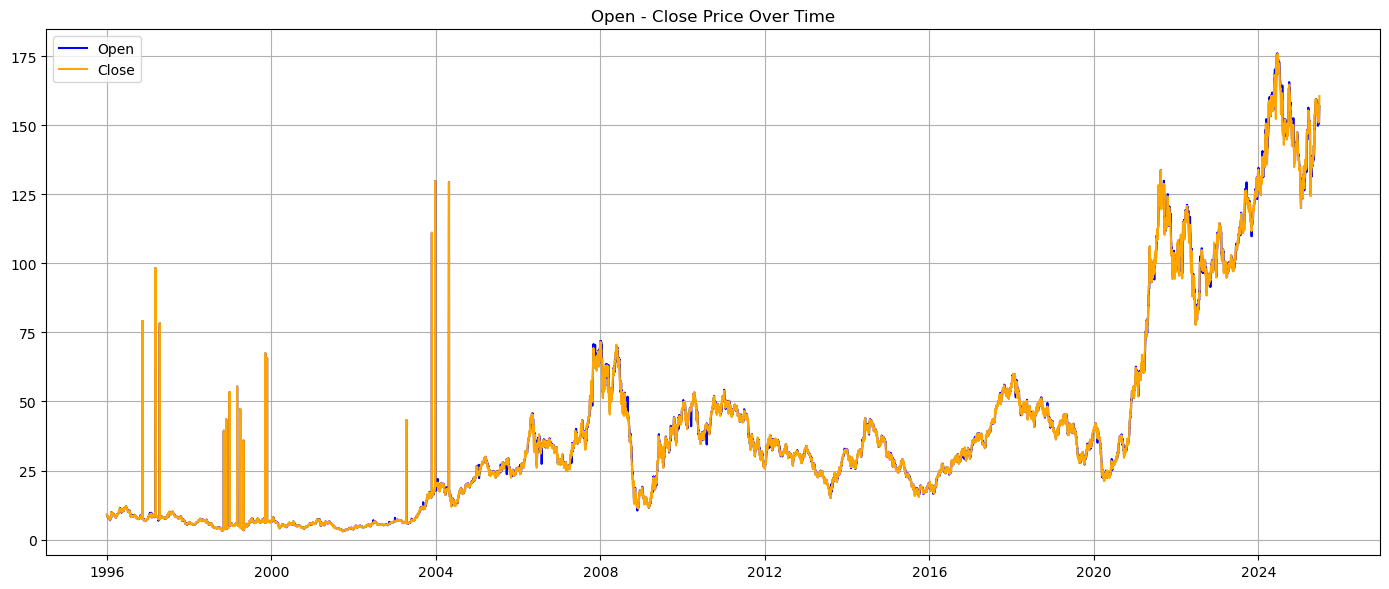

In [5]:
plt.figure(figsize = (14,6))
plt.plot(df["Date"], df["Open"], label = "Open", color = "blue")
plt.plot(df["Date"], df["Price"], label = "Close", color = "orange")
plt.title("Open - Close Price Over Time")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

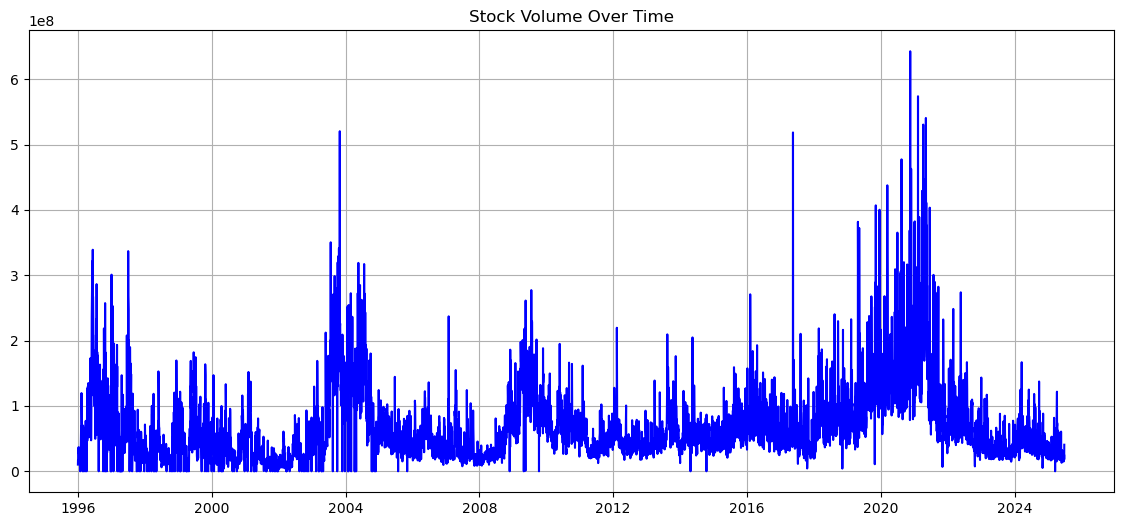

In [6]:
plt.figure(figsize = (14,6))
plt.plot(df["Date"], df["Volume"], label = "Volume", color = "blue")
plt.title("Stock Volume Over Time")
plt.grid()
plt.show()

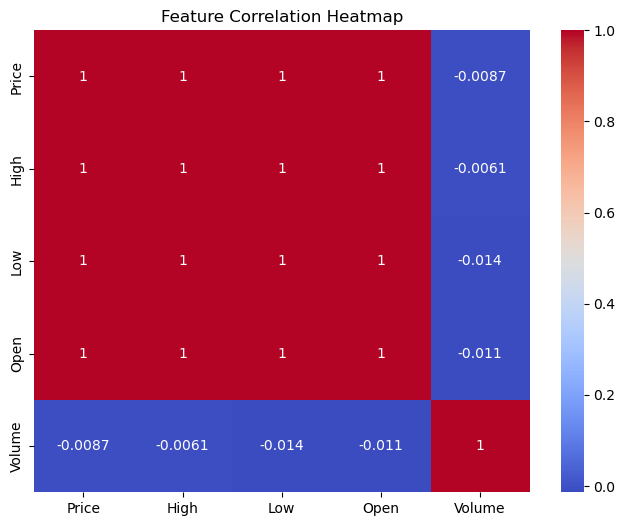

In [8]:
numeric_data = df.select_dtypes(include=("int64", "float64"))
plt.figure(figsize = (8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

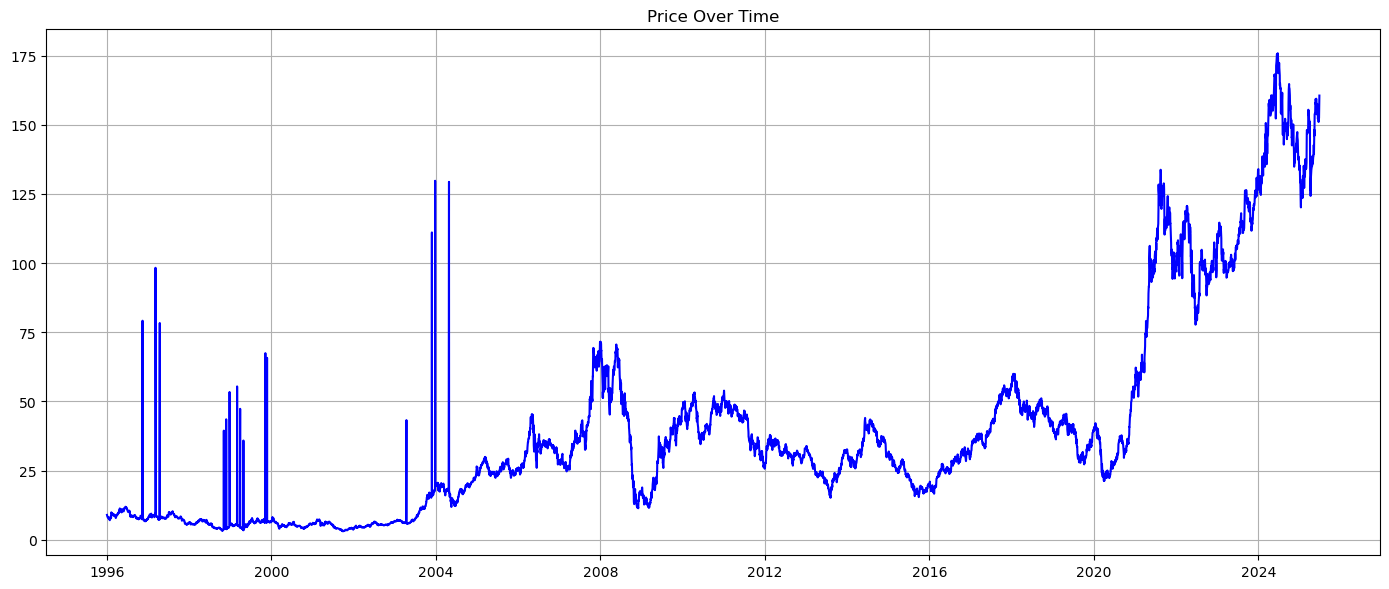

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

prediction = df.loc[(df["Date"] > datetime(2013,1,1)) & (df["Date"] < datetime(2018,1,1))]

plt.figure(figsize = (14,6))
plt.plot(df["Date"], df["Price"], label = "Open", color = "blue")
plt.title("Price Over Time")
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
#Prepare for LSTM Model

stock_close = df["Price"]

dataset = stock_close.values  #covert to numpy array
train_len = int(np.ceil(len(dataset) * 0.95))

#Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

train = scaled_data[:train_len]
x_train,y_train = [], []

for i in range (60, len(train)):
    x_train.append(train[i - 60:i, 0])
    y_train.append(train[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
# Build the model

model = keras.models.Sequential()

# Layer one
model.add(keras.layers.LSTM(64, return_sequences = True, input_shape = (x_train.shape[1],1)))

# Layer two
model.add(keras.layers.LSTM(64, return_sequences = False))

# Third Layer
model.add(keras.layers.Dense(128, activation="relu"))

#Fourth Layer
model.add(keras.layers.Dropout(0.5))

#Output Layer
model.add(keras.layers.Dense(1))

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer="adam", loss="mae", metrics=[keras.metrics.RootMeanSquaredError()])

In [23]:
# train the model

training = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - loss: 0.1681 - root_mean_squared_error: 0.2884
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0938 - root_mean_squared_error: 0.1667
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0833 - root_mean_squared_error: 0.1527
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0830 - root_mean_squared_error: 0.1614
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0794 - root_mean_squared_error: 0.1508
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0779 - root_mean_squared_error: 0.1446
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0790 - root_mean_squared_error: 0.1508
Epoch 8/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0777 - root_mean_squared_error: 0.1606
Epoch 9/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0753 - root_mean_squared_error: 0.1430
Epoch 10/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0730 - r

In [25]:
test_data = scaled_data[train_len - 60:]
x_test, y_test = [], dataset[train_len:]

for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
# Make prediction

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


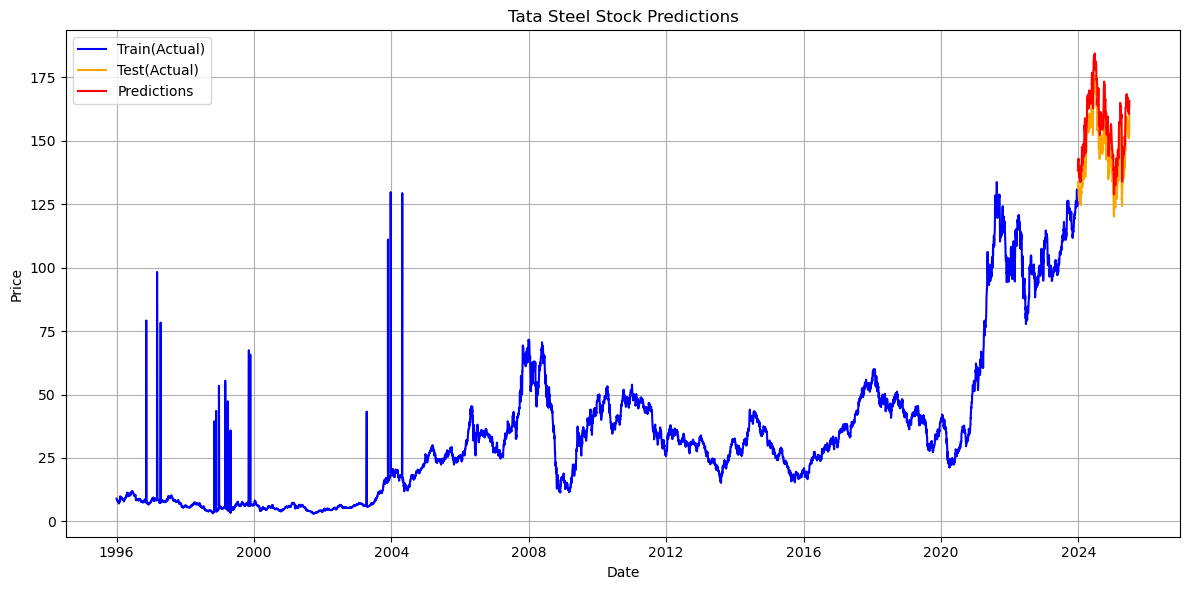

In [32]:
# Plotting data

train = df[:train_len]
test = df[train_len:]

test = test.copy()

test["Predictions"] = predictions

plt.figure(figsize=(12,6))
plt.plot(train["Date"], train["Price"], label = "Train(Actual)", color="blue")
plt.plot(test["Date"], test["Price"], label = "Test(Actual)", color="orange")
plt.plot(test["Date"], test["Predictions"], label = "Predictions", color="red")
plt.title("Tata Steel Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()